In [8]:
from nltk import word_tokenize , sent_tokenize , WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import string
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [4]:
os.chdir("D:/NLP Text data")
print(os.listdir())

['BJT.txt', 'IMBD-Dataset-', 'IMDB Dataset.csv', 'Mosfet.txt', 'Solid state devices.txt', 'Transistor as amplifier.txt']


In [5]:
data = pd.read_csv("IMDB Dataset.csv")
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [6]:
def preprocessing(text) :
    punc = set(string.punctuation)
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    big_tokens = sent_tokenize(str(text))
    preprocessed = []
    for i in big_tokens :
        small_tokens = word_tokenize(i)
        filterd = [ lemmatizer.lemmatize(i.lower()) for i in small_tokens if ( i not in stop_words) and ( i not in punc) and (i.isdigit() == 0)]
        preprocessed.append(" ".join(filterd))
    return " ".join(preprocessed)
data["review_processed"] = data['review'].apply(preprocessing)

In [7]:
print(data)

                                                  review sentiment  \
0      One of the other reviewers has mentioned that ...  positive   
1      A wonderful little production. <br /><br />The...  positive   
2      I thought this was a wonderful way to spend ti...  positive   
3      Basically there's a family where a little boy ...  negative   
4      Petter Mattei's "Love in the Time of Money" is...  positive   
...                                                  ...       ...   
49995  I thought this movie did a down right good job...  positive   
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative   
49997  I am a Catholic taught in parochial elementary...  negative   
49998  I'm going to have to disagree with the previou...  negative   
49999  No one expects the Star Trek movies to be high...  negative   

                                        review_processed  
0      one reviewer mentioned watching oz episode 'll...  
1      a wonderful little production br b

In [16]:
from sklearn.metrics import f1_score , recall_score , precision_score , mean_squared_error
def label(data):
    if data=="positive" :
        return 1
    else :
        return 0
x = data.iloc[:,2] 
y= data.iloc[:,1].apply(label)
print(y)

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7)

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


## **BOW ( Bag of Words )**

In [18]:
acc_train , f1_train , recall_train , precisions_train , rmse_train = [],[],[],[],[]
acc_test , f1_test , recall_test , precisions_test , rmse_test = [],[],[],[],[]
for i in range(2,5) :
   cif = Pipeline([('m1',CountVectorizer(ngram_range=(1,i))),
                   ('m2',MultinomialNB())])
   cif.fit(x_train,y_train)
   #---------------------------------------------------------------------------
   acc_train.append(cif.score(x_train,y_train))
   f1_train.append(f1_score(y_train, cif.predict(x_train)))
   recall_train.append(recall_score(y_train, cif.predict(x_train)))
   precisions_train.append(precision_score(y_train, cif.predict(x_train)))
   rmse_train.append(np.sqrt(mean_squared_error(y_train, cif.predict(x_train))))
   #---------------------------------------------------------------------------
   acc_test.append(cif.score(x_test, y_test))
   f1_test.append(f1_score(y_test, cif.predict(x_test)))
   recall_test.append(recall_score(y_test, cif.predict(x_test)))
   precisions_test.append(precision_score(y_test, cif.predict(x_test)))
   rmse_test.append(np.sqrt(mean_squared_error(y_test, cif.predict(x_test))))
   print(f" n_grams = {i} Done..")

 n_grams = 2 Done..
 n_grams = 3 Done..
 n_grams = 4 Done..


In [20]:
print(acc_train)

[0.9962857142857143, 0.9998, 0.9999714285714286]


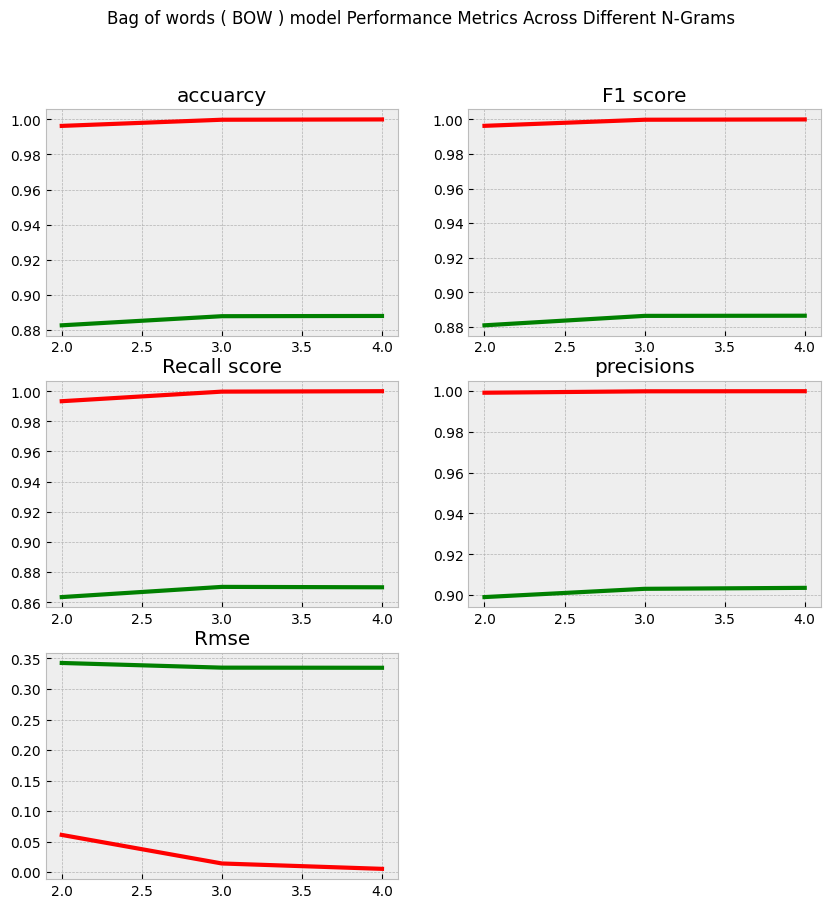

In [28]:
plt.style.use("bmh")
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.plot([2,3,4],acc_train,color="red",linewidth=3)
plt.plot([2,3,4],acc_test,color="green",linewidth=3)
plt.title("accuarcy")

plt.subplot(3,2,2)
plt.plot([2,3,4],f1_train,color="red",linewidth=3)
plt.plot([2,3,4],f1_test,color="green",linewidth=3)
plt.title("F1 score")

plt.subplot(3,2,3)
plt.plot([2,3,4],recall_train,color="red",linewidth=3)
plt.plot([2,3,4],recall_test,color="green",linewidth=3)
plt.title("Recall score")

plt.subplot(3,2,4)
plt.plot([2,3,4],precisions_train,color="red",linewidth=3)
plt.plot([2,3,4],precisions_test,color="green",linewidth=3)
plt.title("precisions")

plt.subplot(3,2,5)
plt.plot([2,3,4],rmse_train,color="red",linewidth=3)
plt.plot([2,3,4],rmse_test,color="green",linewidth=3)
plt.title("Rmse")
plt.suptitle("Bag of words ( BOW ) model Performance Metrics Across Different N-Grams")
plt.show()

## **TD-IDF ( Term frequency - inverse Document frequency)**

In [30]:
acc_train , f1_train , recall_train , precisions_train , rmse_train = [],[],[],[],[]
acc_test , f1_test , recall_test , precisions_test , rmse_test = [],[],[],[],[]
for i in range(2,5) :
   cif = Pipeline([('m1',TfidfVectorizer(ngram_range=(1,i))),
                   ('m2',MultinomialNB())])
   cif.fit(x_train,y_train)
   #---------------------------------------------------------------------------
   acc_train.append(cif.score(x_train,y_train))
   f1_train.append(f1_score(y_train, cif.predict(x_train)))
   recall_train.append(recall_score(y_train, cif.predict(x_train)))
   precisions_train.append(precision_score(y_train, cif.predict(x_train)))
   rmse_train.append(np.sqrt(mean_squared_error(y_train, cif.predict(x_train))))
   #---------------------------------------------------------------------------
   acc_test.append(cif.score(x_test, y_test))
   f1_test.append(f1_score(y_test, cif.predict(x_test)))
   recall_test.append(recall_score(y_test, cif.predict(x_test)))
   precisions_test.append(precision_score(y_test, cif.predict(x_test)))
   rmse_test.append(np.sqrt(mean_squared_error(y_test, cif.predict(x_test))))
   print(f" n_grams = {i} Done..")

 n_grams = 2 Done..
 n_grams = 3 Done..
 n_grams = 4 Done..


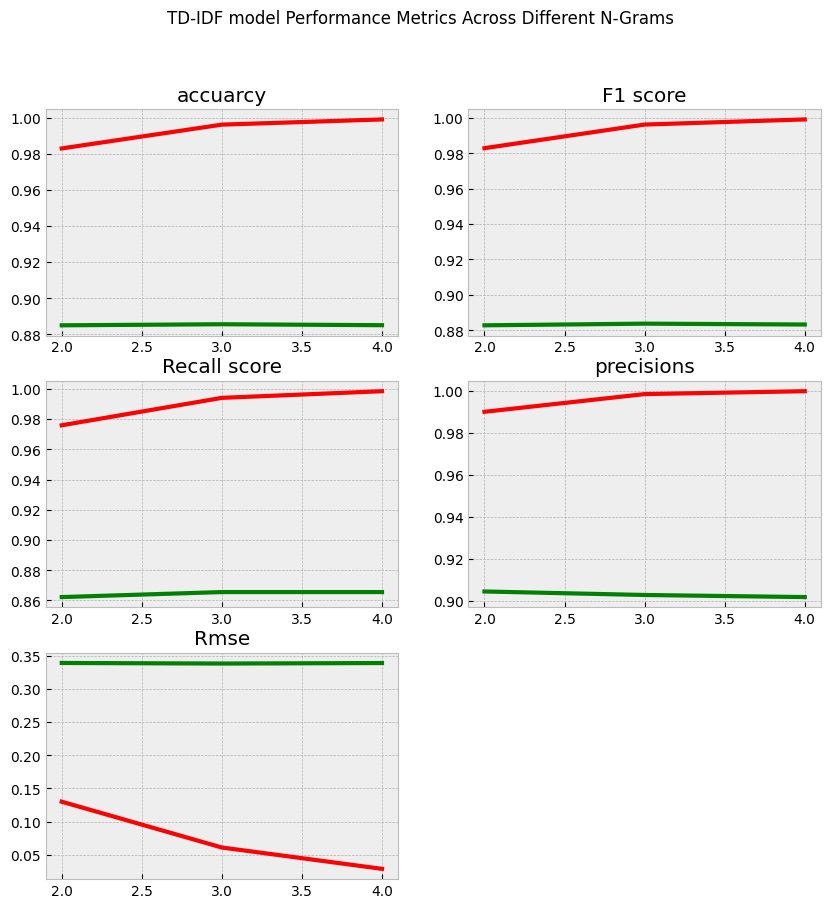

In [32]:
plt.style.use("bmh")
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.plot([2,3,4],acc_train,color="red",linewidth=3)
plt.plot([2,3,4],acc_test,color="green",linewidth=3)
plt.title("accuarcy")

plt.subplot(3,2,2)
plt.plot([2,3,4],f1_train,color="red",linewidth=3)
plt.plot([2,3,4],f1_test,color="green",linewidth=3)
plt.title("F1 score")

plt.subplot(3,2,3)
plt.plot([2,3,4],recall_train,color="red",linewidth=3)
plt.plot([2,3,4],recall_test,color="green",linewidth=3)
plt.title("Recall score")

plt.subplot(3,2,4)
plt.plot([2,3,4],precisions_train,color="red",linewidth=3)
plt.plot([2,3,4],precisions_test,color="green",linewidth=3)
plt.title("precisions")

plt.subplot(3,2,5)
plt.plot([2,3,4],rmse_train,color="red",linewidth=3)
plt.plot([2,3,4],rmse_test,color="green",linewidth=3)
plt.title("Rmse")
plt.suptitle("TD-IDF model Performance Metrics Across Different N-Grams")
plt.show()